## Usage notes
This toolkit works in the following order:

- Set up the input data
- Create model (SM, MOSM, CSM, SM-LMC, CG)
- Make an estimation of the model parameters using BNSE+SM
- Train the model parameters
- Set the prediction range
- Do a prediction

For example:
```
import mogptk

x, y = get_your_data()

data = mogptk.Data()
data.add(x, y)

mosm = mogptk.MOSM(data, Q=3)
mosm.init_params()
mosm.train()

mosm.set_prediction_range(0, 0.0, 5.0, n=200)
x_pred, mu_pred, var_pred = mosm.predict()
```

In [1]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk
import numpy as np

%reload_ext autoreload
%autoreload 2

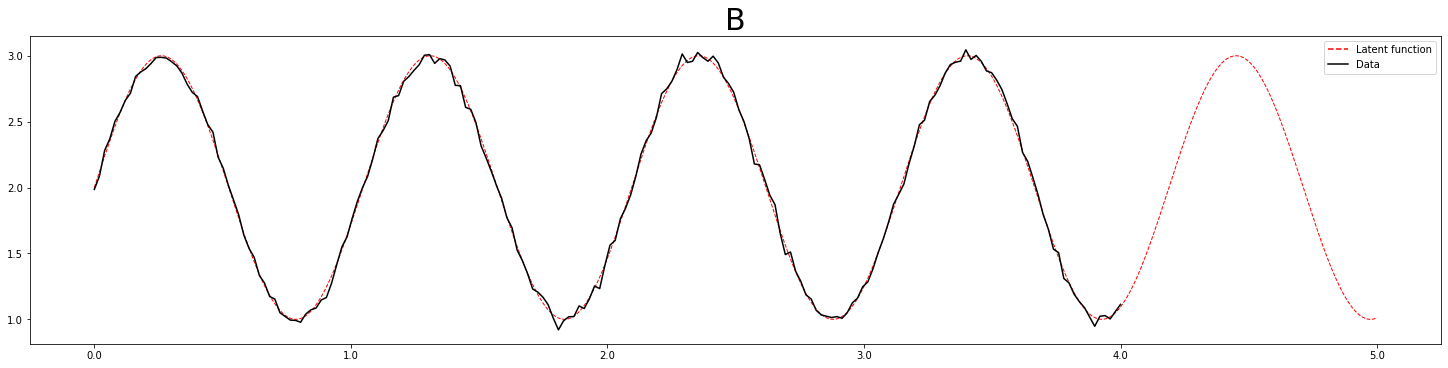

In [20]:
#data = mogptk.Data()
#data.load_csv('data/jura.csv', ['X', 'Y'], ['Cd'])#, 'Cu'])
#data.remove_range('Cd', start=2.0, end=None)
#data.remove_randomly('Cd', pct=0.90)

#data.add_function(lambda x: np.sin(6*x[:,0]) + np.cos(6*x[:,1]), n=200, start=[0.0,0.0], end=[4.0,4.0])
data = mogptk.LoadFunction(lambda x: np.sin(6*x[:,0])+2, n=200, start=0.0, end=4.0, var=0.03, name='B')
#data.add_function(lambda x: np.sin(6*x)+2 - np.sin(4*x), n=20, start=0.0, end=4.0, var=0.03, name='C')
#data.remove_range('A', start=2.0, end=None)

data.set_pred_range(0.0, 5.0, n=200)

data.plot()

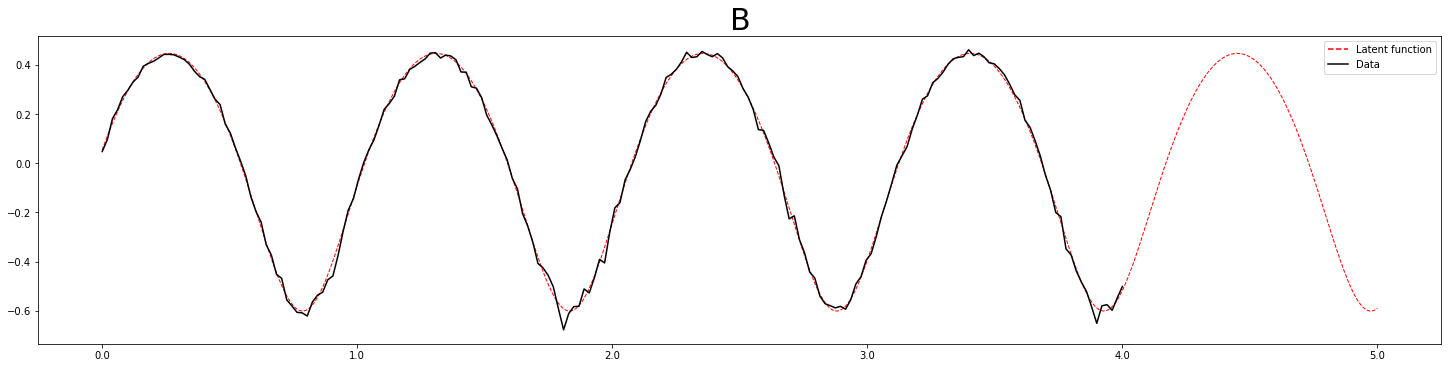

In [21]:
data.transform(mogptk.TransformLog)
data.plot()

In [27]:
sm = mogptk.SM(data, Q=3)
display(sm.get_params())

[{'num_mixtures': array(3, dtype=int32),
  'mixture_weights': array([-0.50858311, -0.61695869,  0.27514797]),
  'mixture_scales': array([[1.12836734, 0.47515849, 1.5932692 ]]),
  'mixture_means': array([[-0.25797281],
         [ 2.54056955],
         [-0.23985428]])}]

[{'num_mixtures': array(3, dtype=int32),
  'mixture_weights': array([2.63193353, 0.19073429, 0.17733218]),
  'mixture_scales': array([[0.18305107, 0.17475666, 0.22659408]]),
  'mixture_means': array([[0.95041508],
         [0.6269754 ],
         [1.27385477]])}]

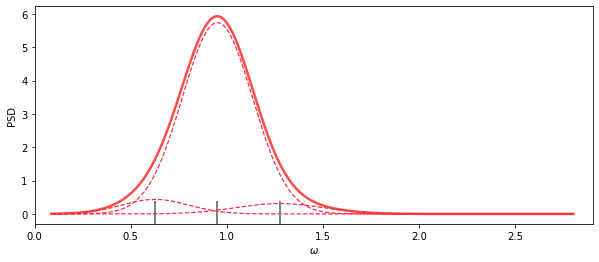

In [28]:
sm.estimate_params()
display(sm.get_params())
sm.plot_psd()

Optimization terminated successfully.
         Current function value: -463.435334
         Iterations: 95
         Function evaluations: 104
         Gradient evaluations: 104
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -463.435334
  Number of iterations: 95
  Number of functions evaluations: 104
Done in  0.023324406147003172  minutes


[{'num_mixtures': array(3, dtype=int32),
  'mixture_weights': array([1.00000000e-06, 1.41221991e-01, 2.68667210e-03]),
  'mixture_scales': array([[9.54546182e-06, 1.00000001e-06, 5.52357451e-01]]),
  'mixture_means': array([[0.95416464],
         [0.95416451],
         [1.49289513]])}]

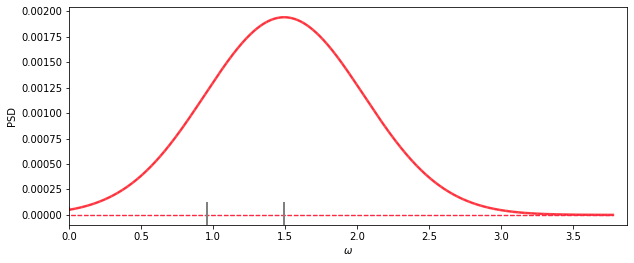

In [15]:
sm.train(method='BFGS')
display(sm.get_params())
sm.plot_psd()

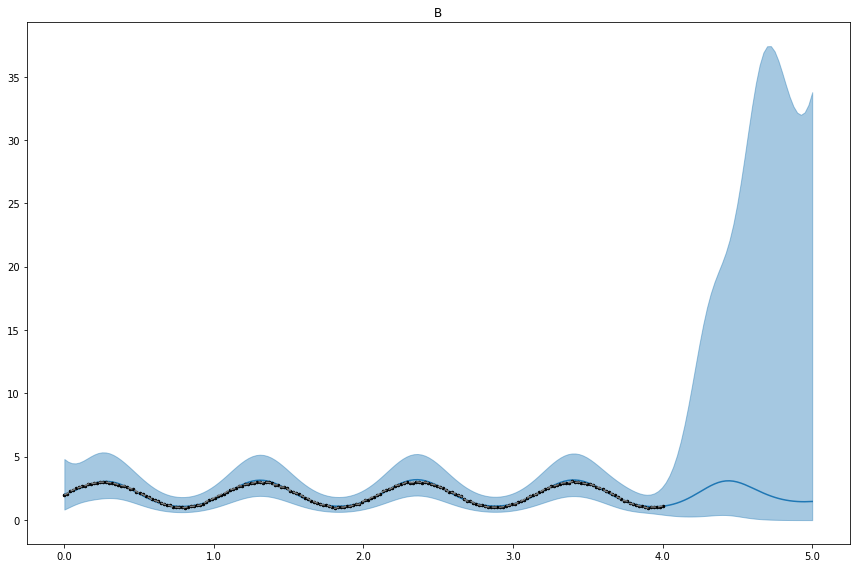

In [32]:
sm.predict(plot=True)

## MOSM

In [33]:
mosm = mogptk.MOSM(data, Q=3)
display(mosm.get_params())

[{'magnitude': array([0.3535589]),
  'mean': array([[1.3890449]]),
  'variance': array([[0.66206642]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'magnitude': array([0.07827071]),
  'mean': array([[0.51731588]]),
  'variance': array([[0.33647768]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'magnitude': array([-2.23987106]),
  'mean': array([[0.2108272]]),
  'variance': array([[0.79179461]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'noise': array([0.86792831])}]

         Current function value: -465.890396
         Iterations: 142
         Function evaluations: 213
         Gradient evaluations: 203
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -465.890396
  Number of iterations: 142
  Number of functions evaluations: 213
Done in  0.040236409505208334  minutes


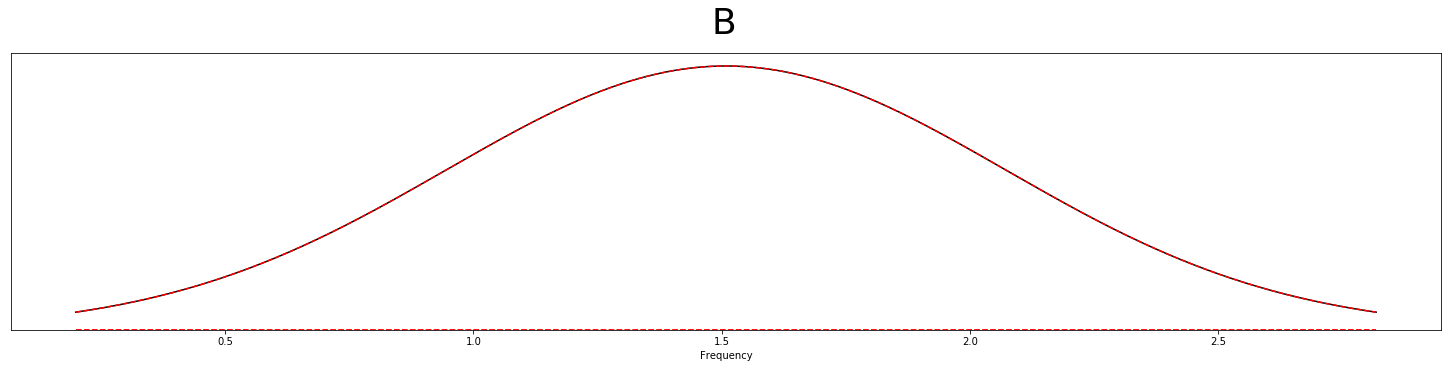

[{'magnitude': array([1.]),
  'mean': array([[6.002297]]),
  'variance': array([[1.10547443e-05]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'magnitude': array([1.]),
  'mean': array([[6.00230315]]),
  'variance': array([[2.00012401e-06]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'magnitude': array([1.]),
  'mean': array([[9.4792021]]),
  'variance': array([[1.12590288]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'noise': array([0.0045736])}]

In [39]:
mosm.estimate_params(method='SM', plot=True)
display(mosm.get_params())

In [40]:
mosm.fix_param('variance')
mosm.train()
display(mosm.get_params())

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -456.086621
  Number of iterations: 59
  Number of functions evaluations: 85
Done in  0.03087031046549479  minutes


[{'magnitude': array([3.5568403]),
  'mean': array([[6.00225327]]),
  'variance': array([[1.10547443e-05]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'magnitude': array([1.8883448]),
  'mean': array([[6.00229326]]),
  'variance': array([[2.00012401e-06]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'magnitude': array([-0.02243583]),
  'mean': array([[11.78476377]]),
  'variance': array([[1.12590288]]),
  'delay': array([[0.]]),
  'phase': array([0.])},
 {'noise': array([0.00045963])}]

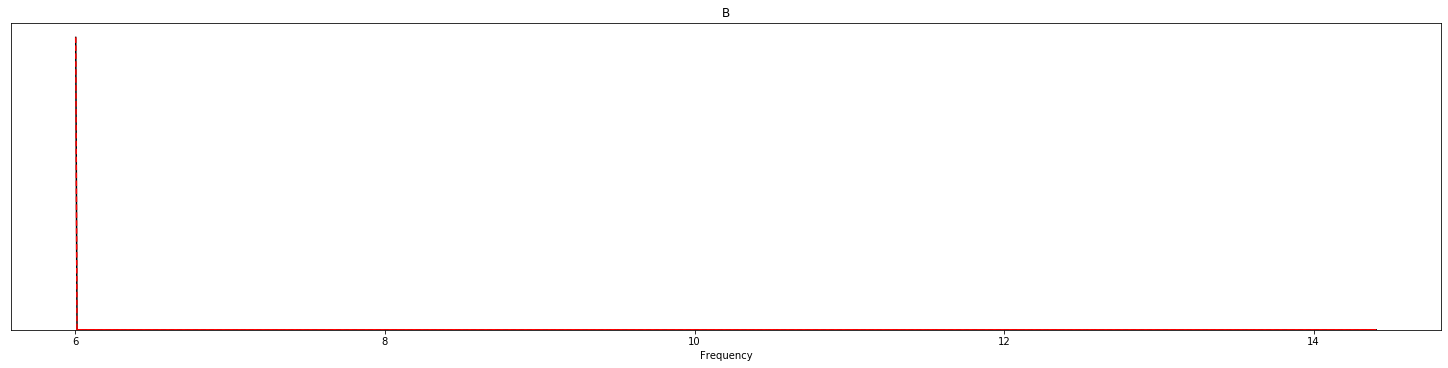

In [41]:
mosm.plot()

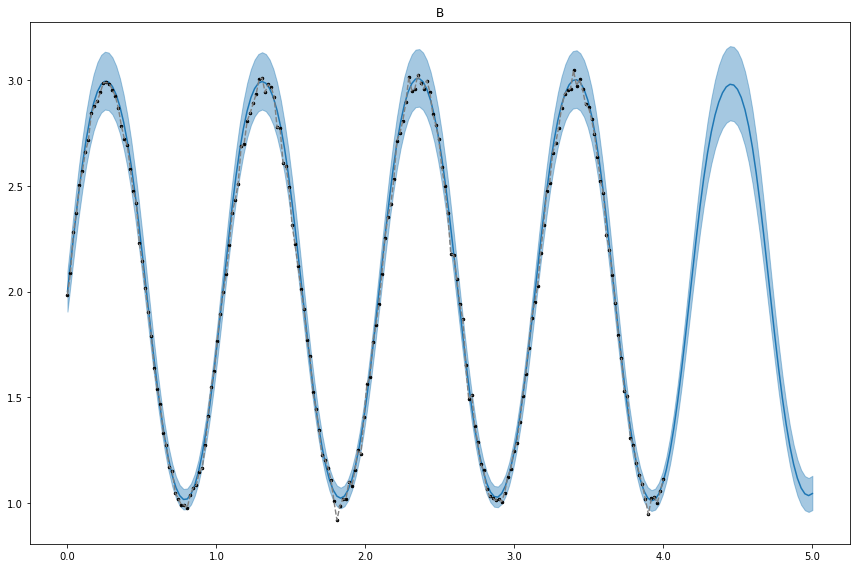

In [42]:
data.set_pred_range(0.0, 5.0, n=200)
mosm.predict(plot=True)

In [ ]:
mosm.save_params('mosm')
display(mosm.get_params())

In [ ]:
mosm2 = mogptk.MOSM(data, Q=3)
mosm2.load_params('mosm')
display(mosm2.get_params())

In [ ]:
mosm2.dataset.channels[0].set_pred_range(0.0, 5.0, n=200)
mosm2.predict(plot=True)

## SM-LMC

In [43]:
smlmc = mogptk.SM_LMC(data, Q=3, Rq=1)
display(smlmc.get_params())

[{'constant': array([[0.17443827]]),
  'mean': array([0.03076739]),
  'variance': array([0.23361333])},
 {'constant': array([[0.45917857]]),
  'mean': array([0.02624792]),
  'variance': array([0.98134128])},
 {'constant': array([[-1.27324996]]),
  'mean': array([0.97394329]),
  'variance': array([0.43654525])},
 {'noise': array([0.01912391])}]

         Current function value: -465.890396
         Iterations: 142
         Function evaluations: 213
         Gradient evaluations: 203
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -465.890396
  Number of iterations: 142
  Number of functions evaluations: 213
Done in  0.042711810270945234  minutes


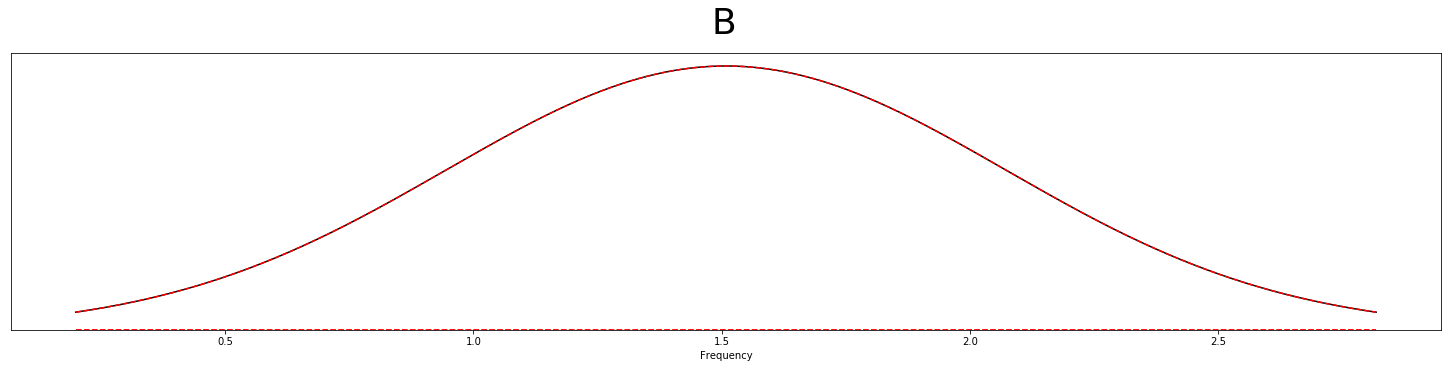

[{'constant': array([[7.1656478e-06]]),
  'mean': array([6.002297]),
  'variance': array([1.10547443e-05])},
 {'constant': array([[0.13142616]]),
  'mean': array([6.00230315]),
  'variance': array([2.00012401e-06])},
 {'constant': array([[0.00253756]]),
  'mean': array([9.4792021]),
  'variance': array([1.12590288])},
 {'noise': array([0.0045736])}]

In [46]:
smlmc.estimate_params(method='SM')
display(smlmc.get_params())

In [47]:
smlmc.train()
display(smlmc.get_params())

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -467.510748
  Number of iterations: 60
  Number of functions evaluations: 97
Done in  0.03402134974797567  minutes


[{'constant': array([[0.00488555]]),
  'mean': array([6.00342877]),
  'variance': array([1.10546986e-05])},
 {'constant': array([[0.36650968]]),
  'mean': array([6.00412579]),
  'variance': array([1.07925399e-06])},
 {'constant': array([[-0.04788336]]),
  'mean': array([12.04267588]),
  'variance': array([1.16491592e-06])},
 {'noise': array([1.00001106e-06])}]

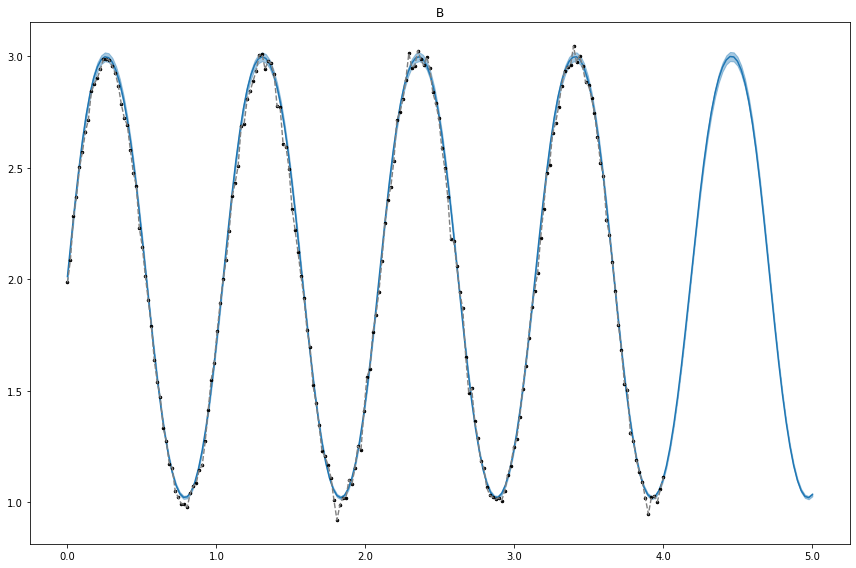

In [49]:
smlmc.predict(plot=True)

## CSM

In [50]:
csm = mogptk.CSM(data, Q=3, Rq=1)
display(csm.get_params())

[{'constant': array([[0.66241026]]),
  'mean': array([0.81750985]),
  'variance': array([0.40881965]),
  'phase': array([[0.]])},
 {'constant': array([[0.56533056]]),
  'mean': array([0.41605739]),
  'variance': array([0.68515456]),
  'phase': array([[0.]])},
 {'constant': array([[0.83048874]]),
  'mean': array([0.6795295]),
  'variance': array([0.82952741]),
  'phase': array([[0.]])},
 {'noise': array([0.52880951])}]

         Current function value: -465.890396
         Iterations: 142
         Function evaluations: 213
         Gradient evaluations: 203
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -465.890396
  Number of iterations: 142
  Number of functions evaluations: 213
Done in  0.04024829864501953  minutes


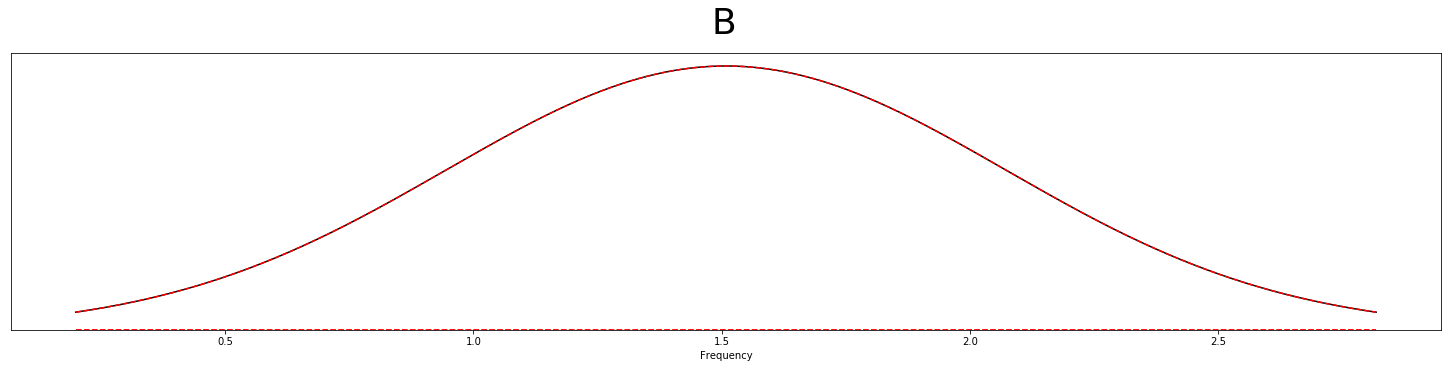

[{'constant': array([[7.1656478e-06]]),
  'mean': array([6.002297]),
  'variance': array([1.10547443e-05]),
  'phase': array([[1.e-06]])},
 {'constant': array([[0.13142616]]),
  'mean': array([6.00230315]),
  'variance': array([2.00012401e-06]),
  'phase': array([[1.e-06]])},
 {'constant': array([[0.00253756]]),
  'mean': array([9.4792021]),
  'variance': array([1.12590288]),
  'phase': array([[1.e-06]])},
 {'noise': array([0.00031268])}]

In [54]:
csm.estimate_params(method='SM')
display(csm.get_params())

In [55]:
csm.train()
display(csm.get_params())

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -467.511343
  Number of iterations: 50
  Number of functions evaluations: 72
Done in  0.03749993642171224  minutes


[{'constant': array([[7.16546971e-06]]),
  'mean': array([5.99713878]),
  'variance': array([1.10545022e-05]),
  'phase': array([[1.e-06]])},
 {'constant': array([[0.12821983]]),
  'mean': array([6.00410222]),
  'variance': array([1.9572722e-06]),
  'phase': array([[1.e-06]])},
 {'constant': array([[0.00229816]]),
  'mean': array([12.04206146]),
  'variance': array([2.1405349e-06]),
  'phase': array([[1.e-06]])},
 {'noise': array([0.00046175])}]

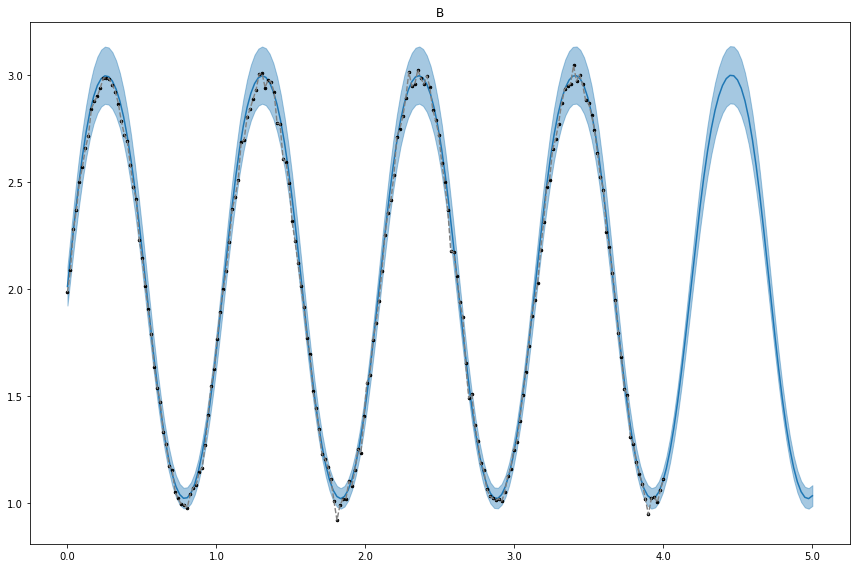

In [56]:
csm.predict(plot=True)

## CONV

In [67]:
conv = mogptk.CONV(data, Q=3)
display(conv.get_params())

[{'constant': array([0.89723151]), 'variance': array([[0.]])},
 {'constant': array([0.54203429]), 'variance': array([[0.]])},
 {'constant': array([0.88014076]), 'variance': array([[0.]])},
 {'noise': array([0.18376906])}]

In [70]:
conv.estimate_params(method='SM')
display(conv.get_params())

         Current function value: -436.431274
         Iterations: 176
         Function evaluations: 287
         Gradient evaluations: 276
INFO:tensorflow:Optimization terminated with:
  Message: Desired error not necessarily achieved due to precision loss.
  Objective function value: -436.431274
  Number of iterations: 176
  Number of functions evaluations: 287
Done in  0.04291450579961141  minutes


[{'constant': array([1.]), 'variance': array([[0.70990675]])},
 {'constant': array([1.]), 'variance': array([[16.16199166]])},
 {'constant': array([1.]), 'variance': array([[133.96197666]])},
 {'noise': array([0.0045736])}]

In [ ]:
conv.train(method='Adam')
display(conv.get_params())

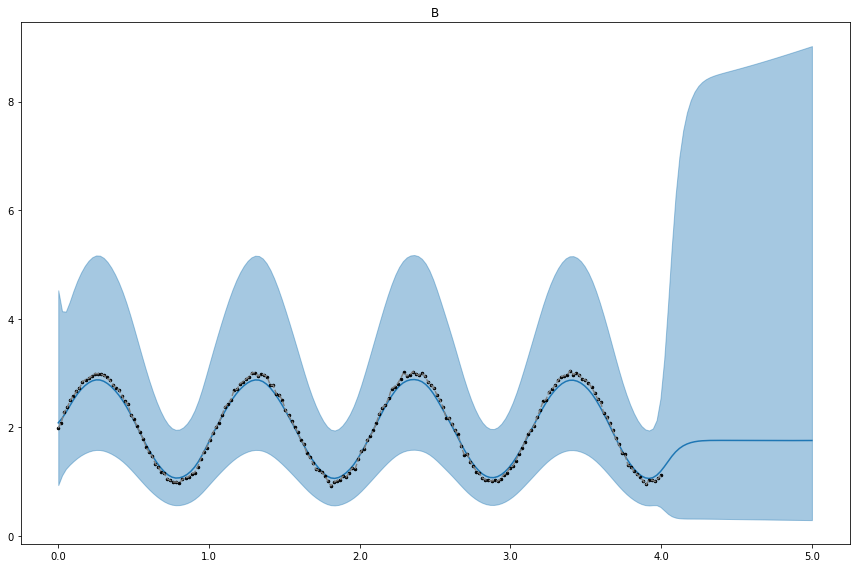

In [64]:
conv.predict(plot=True)